In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import math
import dask.dataframe as dd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from string import ascii_letters


In [2]:
# Load data
df = pd.read_csv("ca-dealers-used.csv",dtype={'fuel_type': 'object', 'engine_block': 'object'})

In [3]:
df.dtypes

id               object
vin              object
price           float64
miles           float64
stock_no         object
year            float64
make             object
model            object
trim             object
body_type        object
vehicle_type     object
drivetrain       object
transmission     object
fuel_type        object
engine_size     float64
engine_block     object
seller_name      object
street           object
city             object
state            object
zip              object
dtype: object

In [4]:
len(df)

393603

In [5]:
df.head(5)

id                vin     price    miles   stock_no    year  \
0  b39ea795-eca9  19UNC1B01HY800062  179999.0   9966.0    V-P4139  2017.0   
1  026cb5b1-6e3e  19UNC1B02HY800023  179995.0   5988.0  PPAP70374  2017.0   
2  5cd5d5b2-5cc2  19UNC1B02HY800071  168528.0  24242.0     B21085  2017.0   
3  b32473ed-5922  19UNC1B02LY800001  220000.0   6637.0     AP5333  2020.0   
4  ac40c9fc-0676  19UNC1B02LY800001  220000.0   6637.0     AP5333  2020.0   

    make model  trim body_type  ... drivetrain transmission  \
0  Acura   NSX  Base     Coupe  ...        4WD    Automatic   
1  Acura   NSX  Base     Coupe  ...        4WD    Automatic   
2  Acura   NSX  Base     Coupe  ...        4WD    Automatic   
3  Acura   NSX  Base     Coupe  ...        4WD    Automatic   
4  Acura   NSX  Base     Coupe  ...        4WD    Automatic   

                     fuel_type engine_size  engine_block  \
0  Electric / Premium Unleaded         3.5             V   
1  Electric / Premium Unleaded         3.5             V   
2  Electric / Premium Unleaded         3.5             V   
3  Electric / Premium Unleaded         3.5             V   
4  Electric / Premium Unleaded         3.5             V   

             seller_name                          street                 city  \
0       edmundston honda                475 Rue Victoria           Edmundston   
1  garage daniel lessard  2795 Route-du-prsident-kennedy  Notre-dame-des-pins   
2         lougheed acura           1388 Lougheed Highway            Coquitlam   
3        drive autogroup          1305 Parkway Suite 600            Pickering   
4        acura pickering               575 Kingston Road            Pickering   

  state      zip  
0    NB  E3V 2K7  
1    QC  G0M 1K0  
2    BC  V3K 6S4  
3    ON  L1V 3P2  
4    ON  L1V 3N7  

[5 rows x 21 columns]

In [6]:
# Only pick records from Toronto
df=df[df.state == "ON"]

In [7]:
df=df[df.city == "Toronto"]

In [8]:
# drop irrelevant columns for this research
drop_columns = ['id', 'vin', 'stock_no', 'seller_name','street','city','state','zip']

In [9]:
df = df.drop(columns = drop_columns)

In [10]:
# EDA analysis
df.dtypes

price           float64
miles           float64
year            float64
make             object
model            object
trim             object
body_type        object
vehicle_type     object
drivetrain       object
transmission     object
fuel_type        object
engine_size     float64
engine_block     object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998 entries, 39 to 393573
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         13811 non-null  float64
 1   miles         13229 non-null  float64
 2   year          14998 non-null  float64
 3   make          14998 non-null  object 
 4   model         14807 non-null  object 
 5   trim          13954 non-null  object 
 6   body_type     13442 non-null  object 
 7   vehicle_type  13278 non-null  object 
 8   drivetrain    14262 non-null  object 
 9   transmission  14276 non-null  object 
 10  fuel_type     12615 non-null  object 
 11  engine_size   12607 non-null  float64
 12  engine_block  12554 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.6+ MB


In [12]:
missing_values_count = df.isnull().sum()
missing_values_count

price           1187
miles           1769
year               0
make               0
model            191
trim            1044
body_type       1556
vehicle_type    1720
drivetrain       736
transmission     722
fuel_type       2383
engine_size     2391
engine_block    2444
dtype: int64

In [13]:
df['price'].describe()

count     13811.000000
mean      25069.024835
std       21359.905212
min           0.000000
25%       14855.500000
50%       20900.000000
75%       29950.000000
max      589000.000000
Name: price, dtype: float64

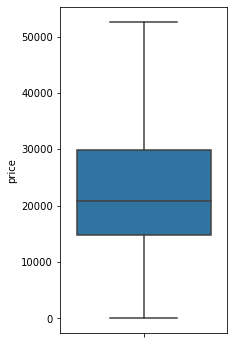

In [14]:
plt.figure(figsize=(3,6))
sns.boxplot(y='price', data=df, showfliers=False);

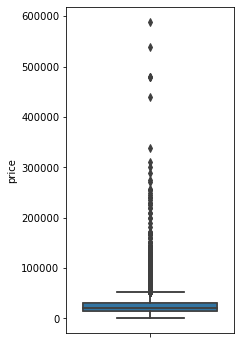

In [15]:
plt.figure(figsize=(3,6))
sns.boxplot(y='price', data=df, showfliers=False)
sns.boxplot(y='price', data=df);

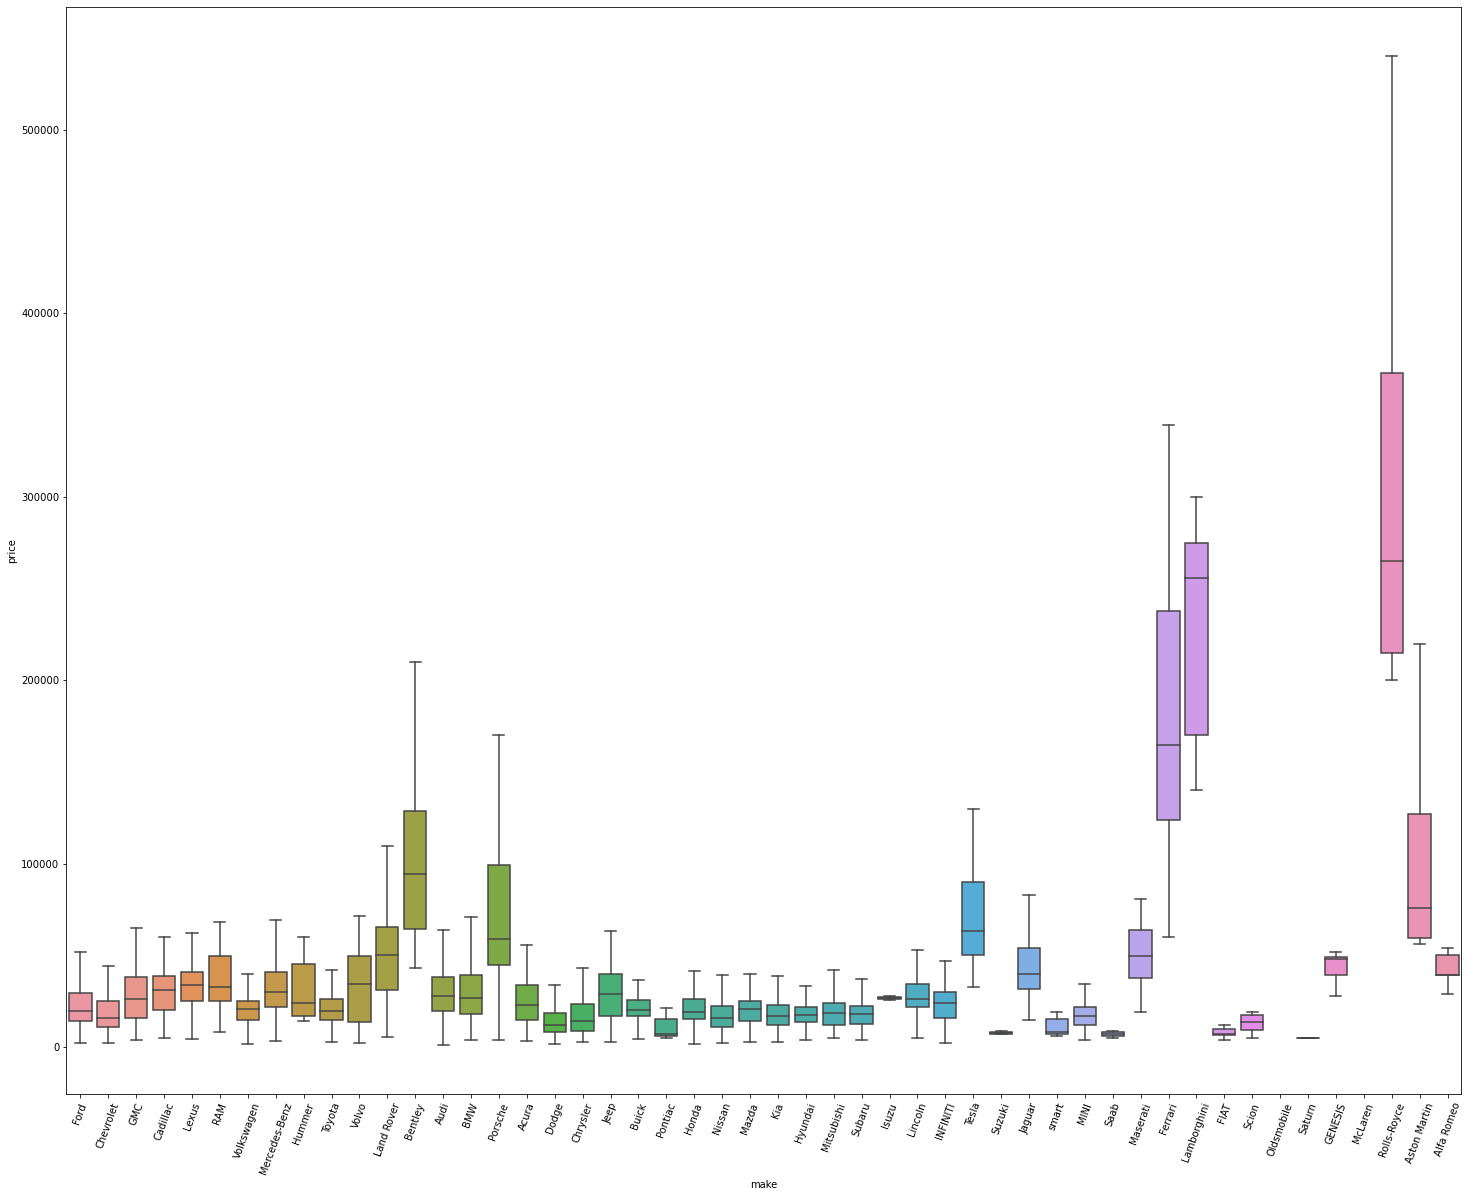

In [16]:
plt.figure(figsize=(25,20))
plt.xticks(rotation=70)
sns.boxplot(y='price', x='make', data=df, showfliers=False)

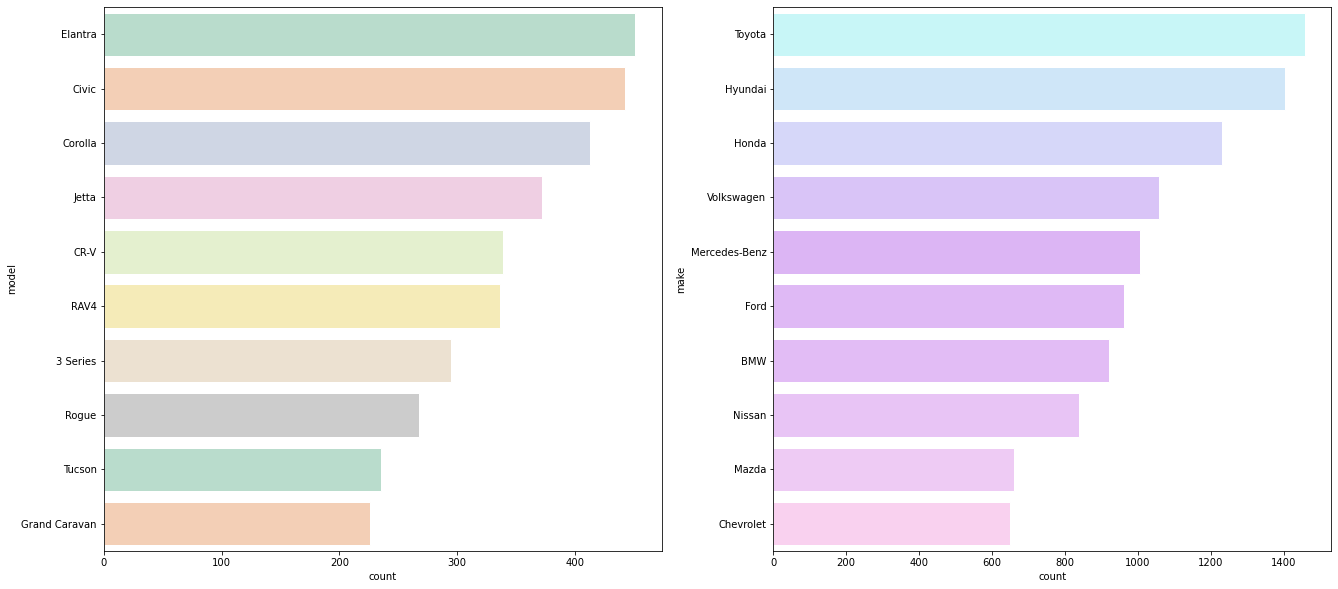

In [17]:
colors = ["#C0FDFF", "#C8E7FF","#D0D1FF","#D8BBFF","#DEAAFF","#E2AFFF","#E5B3FE","#ECBCFD","#F3C4FB","#FFCBF2"]
sns.set_palette(sns.color_palette(colors))


fig, ax =plt.subplots(1,2,figsize=(22, 10))
sns.set(rc={"axes.facecolor":"#fcfcfc", "axes.grid":False,'xtick.labelsize':20,'ytick.labelsize':20})
sns.countplot(y ='make',data = df,order=df.make.value_counts().iloc[:10].index, ax = ax[1],palette = colors) 
sns.countplot(y ='model',data = df,order=df.model.value_counts().iloc[:10].index, ax= ax[0],palette = "Pastel2")
fig.show()

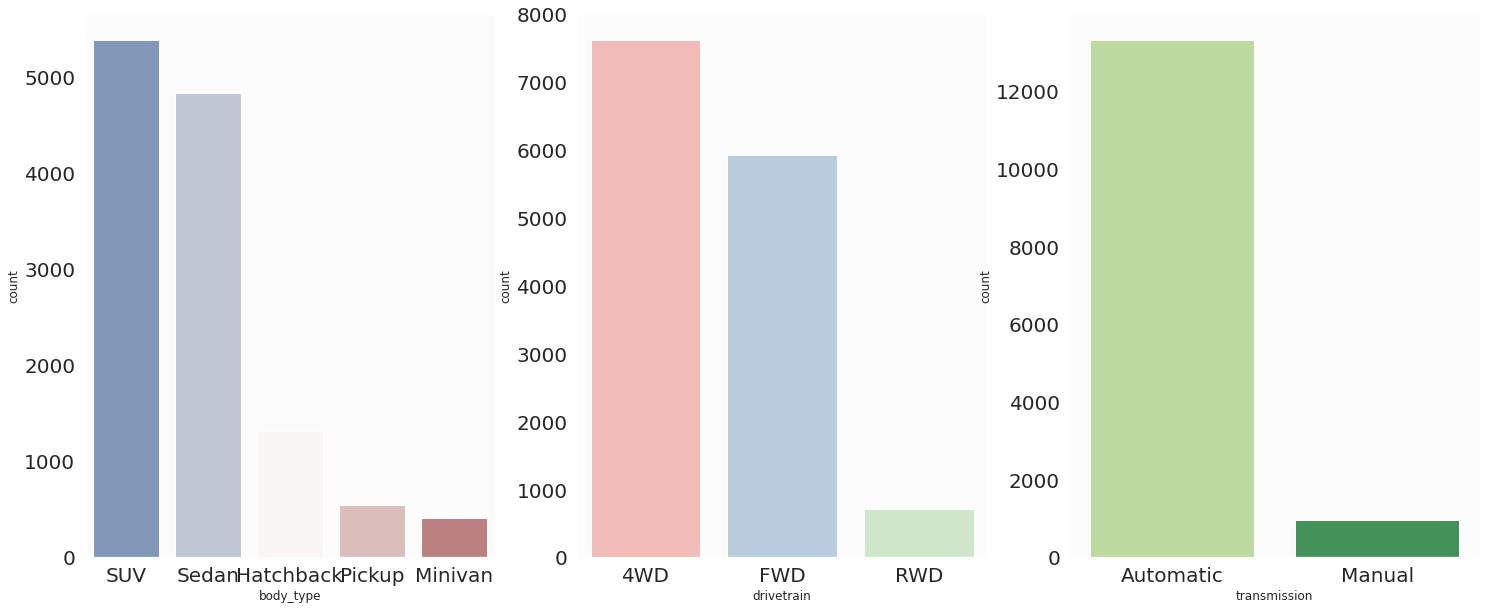

In [18]:
fig, ax =plt.subplots(1,3,figsize=(25, 10))
sns.set(rc={"axes.facecolor":"#fcfcfc", "axes.grid":False,'xtick.labelsize':15,'ytick.labelsize':15})
sns.countplot(x ='body_type',data = df,order=df.body_type.value_counts().iloc[:5].index, ax = ax[0],palette="vlag")
sns.countplot(x ='drivetrain',data = df,order=df.drivetrain.value_counts().iloc[:5].index, ax = ax[1],palette="Pastel1")
sns.countplot(x ='transmission',data = df,order=df.transmission.value_counts().iloc[:5].index, ax = ax[2],palette="YlGn")
fig.show()

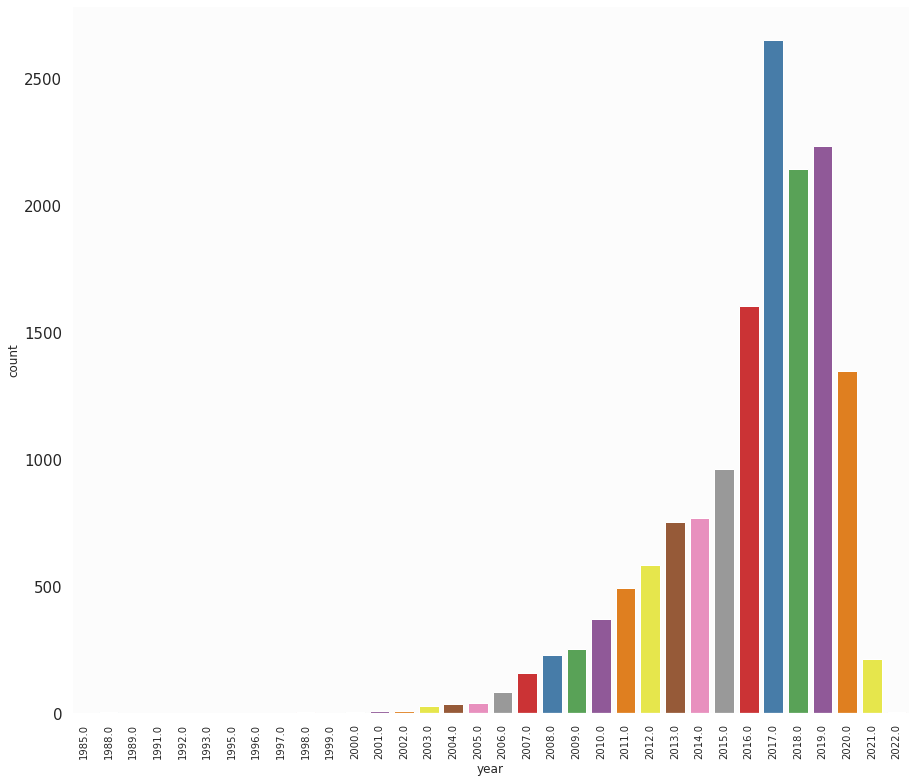

In [19]:
plt.figure(figsize=(15, 13))
ax = sns.countplot(x = 'year', data=df, palette='Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontsize=10);

In [20]:
df.tail(20)

price     miles    year           make               model  \
393008   9990.0   96588.0  2013.0        Hyundai       Sonata Hybrid   
393022      NaN  154300.0  2013.0        Hyundai       Sonata Hybrid   
393040  38998.0   15365.0  2020.0        Hyundai       Sonata Hybrid   
393067   8995.0  112000.0  2012.0            Kia              Optima   
393134  16999.0  103590.0  2016.0            Kia              Optima   
393144  14950.0   90000.0  2016.0            Kia              Optima   
393177  13888.0   97123.0  2015.0            Kia              Optima   
393232  18990.0   64476.0  2017.0            Kia              Optima   
393235  18990.0   64476.0  2017.0            Kia              Optima   
393236  18990.0   64476.0  2017.0            Kia              Optima   
393237  18990.0   64476.0  2017.0            Kia              Optima   
393241  27654.0      99.0  2019.0            Kia                Niro   
393279  16647.0  122138.0  2017.0            Kia                Niro   
393454  38140.0    8500.0  2020.0            Kia                Niro   
393545  62988.0   22352.0  2020.0     Land Rover  Range Rover Evoque   
393546  62988.0   22352.0  2020.0     Land Rover  Range Rover Evoque   
393561  26450.0   56000.0  2017.0            BMW            3 Series   
393568  45880.0   69000.0  2018.0  Mercedes-Benz           GLC-Class   
393570  43880.0   65000.0  2018.0  Mercedes-Benz           GLC-Class   
393573  46800.0   19833.0  2018.0  Mercedes-Benz           GLC-Class   

                     trim  body_type vehicle_type drivetrain transmission  \
393008             Hybrid      Sedan          Car        FWD    Automatic   
393022             Hybrid      Sedan          Car        FWD    Automatic   
393040                SEL      Sedan          Car        FWD    Automatic   
393067             Hybrid      Sedan          Car        FWD    Automatic   
393134          EX Hybrid      Sedan          Car        FWD    Automatic   
393144          EX Hybrid      Sedan          Car        FWD    Automatic   
393177          EX Hybrid      Sedan          Car        FWD    Automatic   
393232  EX Plug-In Hybrid      Sedan          Car        FWD    Automatic   
393235  EX Plug-In Hybrid      Sedan          Car        FWD    Automatic   
393236  EX Plug-In Hybrid      Sedan          Car        FWD    Automatic   
393237  EX Plug-In Hybrid      Sedan          Car        FWD    Automatic   
393241                 LX  Hatchback          Car        FWD    Automatic   
393279                 EX  Hatchback          Car        FWD    Automatic   
393454                 EX  Hatchback          Car        FWD    Automatic   
393545                HSE        SUV        Truck        4WD    Automatic   
393546                HSE        SUV        Truck        4WD    Automatic   
393561               330e      Sedan          Car        RWD    Automatic   
393568            GLC350e        SUV        Truck        4WD    Automatic   
393570            GLC350e        SUV        Truck        4WD    Automatic   
393573            GLC350e        SUV        Truck        4WD    Automatic   

                  fuel_type  engine_size engine_block  
393008  Electric / Unleaded          2.4            I  
393022  Electric / Unleaded          2.4            I  
393040  Electric / Unleaded          2.0            I  
393067  Electric / Unleaded          2.4            I  
393134  Electric / Unleaded          2.4            I  
393144  Electric / Unleaded          2.4            I  
393177  Electric / Unleaded          2.4            I  
393232  Electric / Unleaded          2.0            I  
393235  Electric / Unleaded          2.0            I  
393236  Electric / Unleaded          2.0            I  
393237  Electric / Unleaded          2.0            I  
393241  Electric / Unleaded          1.6            I  
393279  Electric / Unleaded          1.6            I  
393454  Electric / Unleaded          1.6            I  
393545  Electric / Unleaded          2.

In [21]:
# Data cleaning and processing:
# Lets drop records without prices, since these records will be useless for our analysis
df_tor=df.dropna(subset=['price'])

In [16]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [17]:
# Using pandas profiling to inspect our dataset
from pandas_profiling import ProfileReport as pp

In [24]:
profile = pp(df_tor)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
# First, lets remove records with prices <1000 and price > 100,000. Cars with price > 100,000 is considered as Luxuray cars and should be studied differently.Toronto has luxury tax on cars over 100,000. 
df_tor=df_tor[(df_tor.price < 100000) & (df_tor.price > 1000 )]

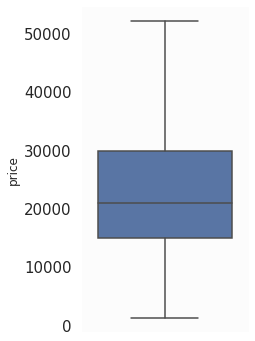

In [26]:
plt.figure(figsize=(3,6))
sns.boxplot(y='price', data=df_tor, showfliers=False);

In [27]:
# Any car that was made before 1990 should be considered as vintage or classic car. There is a special group of people who colloect these cars,however, these cars should not be inlcuded in this study. cars made in 2022 are probably entered by mistake
df_tor=df_tor[(df_tor.year > 1990) & (df_tor.year < 2022 )]

In [28]:
# Below attributes have missing values:
missing_values_count = df_tor.isnull().sum()
missing_values_count

price              0
miles           1559
year               0
make               0
model            168
trim             951
body_type       1425
vehicle_type    1579
drivetrain       665
transmission     654
fuel_type       2178
engine_size     2190
engine_block    2231
dtype: int64

In [29]:
len(df_tor)

13689

In [30]:
# There are records with missing values in 'model','trim'.These records have to be removed as these attributes cant be replaced easily without changing the reality of the instances.
df_tor=df_tor.dropna(subset=['model','trim'])

In [31]:
missing_values_count = df_tor.isnull().sum()
missing_values_count

price              0
miles           1441
year               0
make               0
model              0
trim               0
body_type        927
vehicle_type    1075
drivetrain        91
transmission      87
fuel_type       1131
engine_size     1143
engine_block    1184
dtype: int64

In [32]:
# I am droping records with missnig drivetrain and transmission as well since they are only account for less than 1% of total records.
df_tor=df_tor.dropna(subset=['drivetrain','transmission'])

In [33]:
missing_values_count = df_tor.isnull().sum()
missing_values_count

price              0
miles           1438
year               0
make               0
model              0
trim               0
body_type        866
vehicle_type    1010
drivetrain         0
transmission       0
fuel_type       1032
engine_size     1075
engine_block    1095
dtype: int64

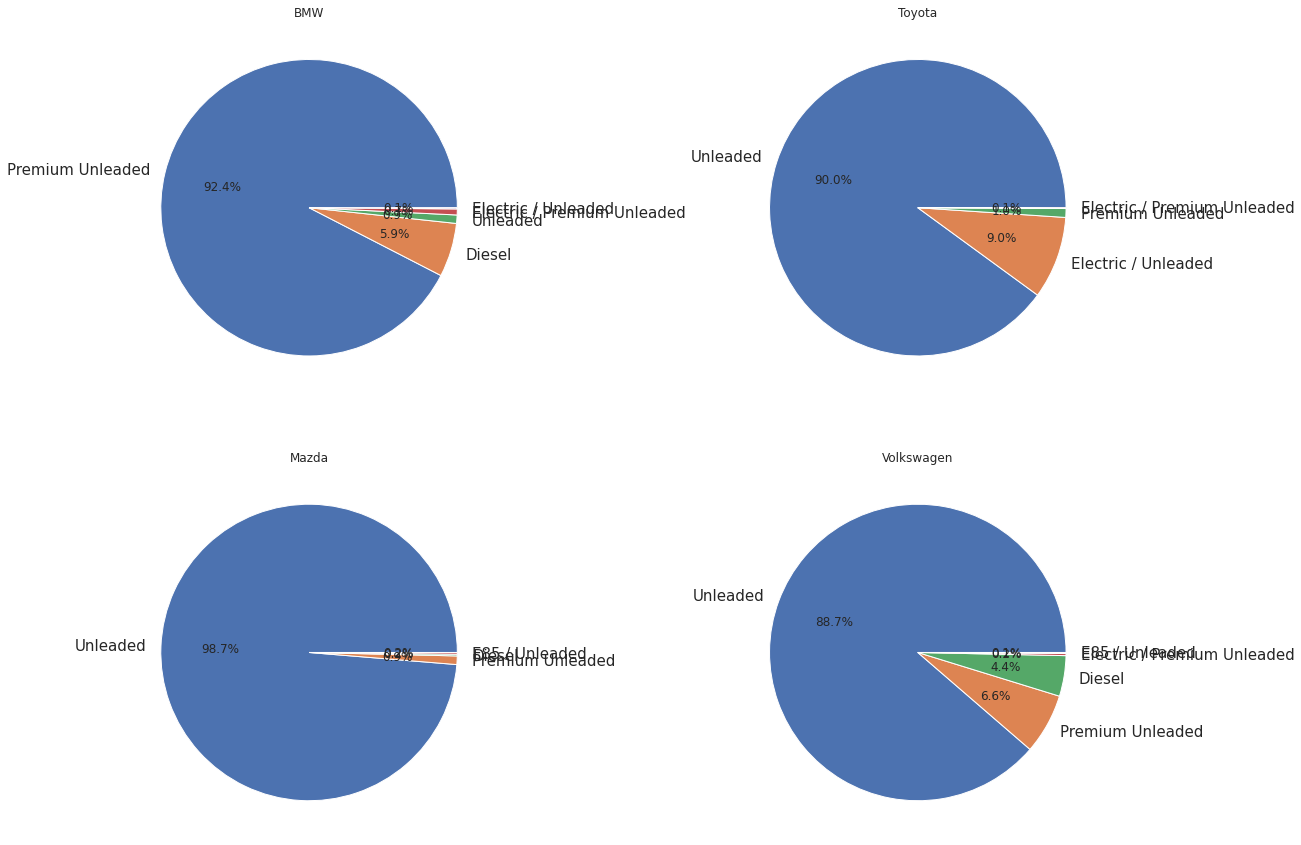

In [34]:
# Fuel_type can be an important feature, also for the purpose of learning, lets try to replace these missing values.
# Panadas profiling indicates that fuel_type has a high correlation with make. We will select 4 random car brands and compare its fuel_type in pie charts.
# Pie charts show that these brands prefer to produce cars with certain fuel_type
plt.figure(figsize=(20,15))
plt.subplot(221)
df_tor["fuel_type"][df_tor["make"]=='BMW'].value_counts().plot.pie(autopct = '%.1f%%', title="BMW")
plt.axis('off')

plt.subplot(222)
df_tor["fuel_type"][df_tor["make"]=='Toyota'].value_counts().plot.pie(autopct = '%.1f%%', title="Toyota")
plt.axis('off')

plt.subplot(223)
df_tor["fuel_type"][df_tor["make"]=='Mazda'].value_counts().plot.pie(autopct = '%.1f%%', title="Mazda")
plt.axis('off')

plt.subplot(224)
df_tor["fuel_type"][df_tor["make"]=='Volkswagen'].value_counts().plot.pie(autopct = '%.1f%%', title="Volkswagen")
plt.axis('off')

plt.show()

In [35]:
# The approach here is to replace missing fuel_type with the most common value for each brand.
fuel_count = df_tor.groupby(['fuel_type','make'], sort=True).size().reset_index(name='Count').sort_values(['make','Count'],ascending=False).groupby(['make']).first()

In [36]:
fuel_count.reset_index(inplace=True)

In [37]:
fuel_pair = fuel_count[['make','fuel_type']]

In [38]:
fuel_replace = pd.Series(fuel_pair.fuel_type.values,index = fuel_pair.make)

In [39]:
df_tor['fuel_type'] = df_tor['fuel_type'].fillna(df_tor['make'].apply(lambda x: fuel_replace.get(x)))

In [40]:
# Miles
# miles has a strong negative correlation with year as shown below:
df_tor.corr()

price     miles      year  engine_size
price        1.000000 -0.479753  0.475010     0.312625
miles       -0.479753  1.000000 -0.728546     0.260777
year         0.475010 -0.728546  1.000000    -0.276809
engine_size  0.312625  0.260777 -0.276809     1.000000

In [41]:
# Replacing missing values in miles with median value of each year.
miles_median =  dict(df_tor.groupby('year')['miles'].median())

In [42]:
df_tor['miles'] = df_tor['miles'].fillna(df_tor['year'].apply(lambda x: miles_median.get(x)))

In [43]:
# Removing the left missing values in miles because no information available for that year.
df_tor=df_tor.dropna(subset=['miles'])

In [44]:
missing_values_count = df_tor.isnull().sum()
missing_values_count

price              0
miles              0
year               0
make               0
model              0
trim               0
body_type        866
vehicle_type    1010
drivetrain         0
transmission       0
fuel_type          0
engine_size     1075
engine_block    1095
dtype: int64

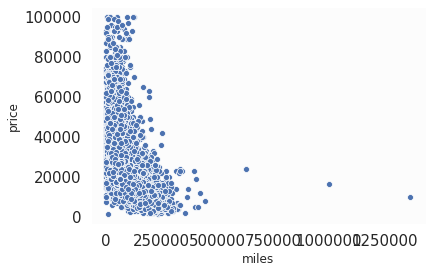

In [45]:
# Lets see if miles has any outliers
ax = sns.scatterplot(x="miles", y="price", data=df_tor)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [46]:
# From the scatterplot above we can easily see some outliers, let's first only keep cars between 1 miles and 500000 miles.
df_tor=df_tor[(df_tor.miles < 500000) & (df_tor.miles > 1 )]

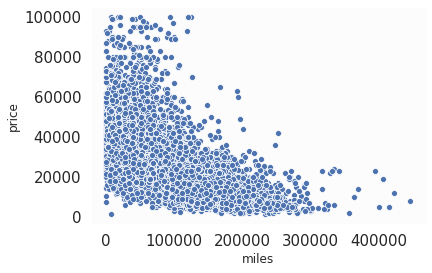

In [47]:
#Miles is another important feature, lets see if it has any outliers:
ax = sns.scatterplot(x="miles", y="price", data=df_tor)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [48]:
# There are several instances where miles > 300000, lets remove those as well
df_tor=df_tor[(df_tor.miles < 300000) & (df_tor.miles > 1 )]

In [49]:
# Body_type
# Pandas profiling indicates that body type has a high correltion with vehicle type, we will replace missing body_type based on vehicle type. Lets take a look at these two attributes together.
df_bt = df_tor.groupby(['vehicle_type','body_type'], sort=True).size().reset_index(name='Count')
df_bt

vehicle_type      body_type  Count
0           Car        Car Van      1
1           Car    Convertible     88
2           Car          Coupe    301
3           Car      Hatchback   1029
4           Car      Micro Car      6
5           Car       Mini Mpv     23
6           Car            SUV      1
7           Car          Sedan   4186
8           Car          Targa      5
9           Car          Wagon    110
10        Truck        Car Van      8
11        Truck      Cargo Van    111
12        Truck    Chassis Cab     10
13        Truck        Cutaway     22
14        Truck       Mini Mpv      5
15        Truck        Minivan    344
16        Truck  Passenger Van     13
17        Truck         Pickup    438
18        Truck            SUV   4777

In [50]:
# We find out that there are 857 records missing both attributes
df_tor.loc[(df_tor['vehicle_type'].isna()) & (df_tor['body_type'].isna())].count()

price           857
miles           857
year            857
make            857
model           857
trim            857
body_type         0
vehicle_type      0
drivetrain      857
transmission    857
fuel_type       857
engine_size       0
engine_block      0
dtype: int64

In [51]:
# Lets drop these records because the values cant be replaced by the approach we are using.
df_tor=df_tor.dropna(subset=['vehicle_type','body_type'],how = 'all')

In [52]:
missing_values_count = df_tor.isnull().sum()
missing_values_count

price             0
miles             0
year              0
make              0
model             0
trim              0
body_type         8
vehicle_type    152
drivetrain        0
transmission      0
fuel_type         0
engine_size     217
engine_block    237
dtype: int64

In [53]:
len(df_tor)

11638

In [54]:
# Replacing missing body_type based on vehicle type
df_bodytype = df_tor.groupby(['vehicle_type','body_type'], sort=True).size().reset_index(name='Count')
df_bodytype

vehicle_type      body_type  Count
0           Car        Car Van      1
1           Car    Convertible     88
2           Car          Coupe    301
3           Car      Hatchback   1029
4           Car      Micro Car      6
5           Car       Mini Mpv     23
6           Car            SUV      1
7           Car          Sedan   4186
8           Car          Targa      5
9           Car          Wagon    110
10        Truck        Car Van      8
11        Truck      Cargo Van    111
12        Truck    Chassis Cab     10
13        Truck        Cutaway     22
14        Truck       Mini Mpv      5
15        Truck        Minivan    344
16        Truck  Passenger Van     13
17        Truck         Pickup    438
18        Truck            SUV   4777

In [55]:
# The approach is to replace the missing value with most common body type for each vehicle type
df_tor.loc[(df_tor['vehicle_type'] == 'Car') & (df_tor['body_type'].isna()),'body_type'] = 'Sedan'
df_tor.loc[(df_tor['vehicle_type'] == 'Truck') & (df_tor['body_type'].isna()),'body_type'] = 'SUV'

In [56]:
# Now lets deal with missing vehicle type, similarly we will replace missing vehicle type based on body_type:
df_vechile = df_tor.groupby(['body_type','vehicle_type'], sort=True).size().reset_index(name='Count')
df_vechile
# We can see that in most cases, each body_type corresponding to one vehicle type. Some outliers are probably entered by mistake.

body_type vehicle_type  Count
0         Car Van          Car      1
1         Car Van        Truck      8
2       Cargo Van        Truck    111
3     Chassis Cab        Truck     10
4     Convertible          Car     88
5           Coupe          Car    301
6         Cutaway        Truck     22
7       Hatchback          Car   1029
8       Micro Car          Car      6
9        Mini Mpv          Car     23
10       Mini Mpv        Truck      5
11        Minivan        Truck    344
12  Passenger Van        Truck     13
13         Pickup        Truck    438
14            SUV          Car      1
15            SUV        Truck   4777
16          Sedan          Car   4194
17          Targa          Car      5
18          Wagon          Car    110

In [57]:
# Lets first drop these 'ourlier' records:
df_tor = df_tor.drop(df_tor[(df_tor['body_type'] == 'Car Van') & (df_tor['vehicle_type'] == 'Car')].index)

In [58]:
df_tor = df_tor.drop(df_tor[(df_tor['body_type'] == 'Mini Mpv') & (df_tor['vehicle_type'] == 'Truck')].index)

In [59]:
df_tor = df_tor.drop(df_tor[(df_tor['body_type'] == 'SUV') & (df_tor['vehicle_type'] == 'Car')].index)

In [60]:
# Replacing missing vehicle type based on its body type
df_vechile = df_tor.groupby(['body_type','vehicle_type'], sort=True).size().reset_index(name='Count')
df_vechile

body_type vehicle_type  Count
0         Car Van        Truck      8
1       Cargo Van        Truck    111
2     Chassis Cab        Truck     10
3     Convertible          Car     88
4           Coupe          Car    301
5         Cutaway        Truck     22
6       Hatchback          Car   1029
7       Micro Car          Car      6
8        Mini Mpv          Car     23
9         Minivan        Truck    344
10  Passenger Van        Truck     13
11         Pickup        Truck    438
12            SUV        Truck   4777
13          Sedan          Car   4194
14          Targa          Car      5
15          Wagon          Car    110

In [61]:
vechile_pair = df_vechile[['body_type','vehicle_type']]
vechile_replace = pd.Series(vechile_pair.vehicle_type.values,index = vechile_pair.body_type)
df_tor['vehicle_type'] = df_tor['vehicle_type'].fillna(df_tor['body_type'].apply(lambda x: vechile_replace.get(x)))

In [62]:
missing_values_count = df_tor.isnull().sum()
missing_values_count

price             0
miles             0
year              0
make              0
model             0
trim              0
body_type         0
vehicle_type      1
drivetrain        0
transmission      0
fuel_type         0
engine_size     216
engine_block    236
dtype: int64

In [63]:
# dropping that one record since no information is available
df_tor=df_tor.dropna(subset=['vehicle_type'])

In [64]:
# Engine_block
# Lets first change engine block of all electric cars to 'N/A'
df_tor.loc[df_tor.fuel_type == 'Electric', 'engine_block'] = 'N/A'

In [65]:
# Pandas Profiling report indicates engine_block is highly correlated with car makes. We will replace the missing values with most commonly used engine block type

In [66]:
block_count = df_tor.groupby(['engine_block','make'], sort=True).size().reset_index(name='Count').sort_values(['make','Count'],ascending=False).groupby(['make']).first()

In [67]:
block_count.reset_index(inplace=True)

In [68]:
block_pair = block_count[['make','engine_block']]

In [69]:
block_replace = pd.Series(block_pair.engine_block.values,index = block_pair.make)
df_tor['engine_block'] = df_tor['engine_block'].fillna(df_tor['make'].apply(lambda x: block_replace.get(x)))

In [70]:
missing_values_count = df_tor.isnull().sum()
missing_values_count

price             0
miles             0
year              0
make              0
model             0
trim              0
body_type         0
vehicle_type      0
drivetrain        0
transmission      0
fuel_type         0
engine_size     215
engine_block      7
dtype: int64

In [71]:
# dropping those 7 records since no information is available
df_tor=df_tor.dropna(subset=['engine_block'])

In [72]:
# Engine_size
# Lets first change engine size of all electric cars to 0
df_tor.loc[df_tor.fuel_type == 'Electric', 'engine_size'] = 0

In [73]:
# Pandas Profiling report indicates engine_block is highly correlated with engine_block . We will replace the missing values with most commonly used engine size for each engine block
size_count = df_tor.groupby(['engine_size','engine_block'], sort=True).size().reset_index(name='Count').sort_values(['engine_block','Count'],ascending=False).groupby(['engine_block']).first()

In [74]:
size_count.reset_index(inplace=True)

In [75]:
size_pair = size_count[['engine_block','engine_size']]

In [76]:
size_replace = pd.Series(size_pair.engine_size.values,index = size_pair.engine_block)

In [77]:
df_tor['engine_size'] = df_tor['engine_size'].fillna(df_tor['engine_block'].apply(lambda x: size_replace.get(x)))

In [78]:
missing_values_count = df_tor.isnull().sum()
missing_values_count

price           0
miles           0
year            0
make            0
model           0
trim            0
body_type       0
vehicle_type    0
drivetrain      0
transmission    0
fuel_type       0
engine_size     0
engine_block    0
dtype: int64

In [79]:
len(df_tor)

11623

In [80]:
df_tor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11623 entries, 446 to 393573
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         11623 non-null  float64
 1   miles         11623 non-null  float64
 2   year          11623 non-null  float64
 3   make          11623 non-null  object 
 4   model         11623 non-null  object 
 5   trim          11623 non-null  object 
 6   body_type     11623 non-null  object 
 7   vehicle_type  11623 non-null  object 
 8   drivetrain    11623 non-null  object 
 9   transmission  11623 non-null  object 
 10  fuel_type     11623 non-null  object 
 11  engine_size   11623 non-null  float64
 12  engine_block  11623 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.2+ MB


In [20]:
profile = pp(df_tor)
profile

NameError: name 'df_tor' is not defined

In [82]:
# The end of data cleaning and processing for toronto data

In [83]:
# Another dataset is selected for comparison for our reserch purpose. The city selected is Boston, since it is comparable to Toronto. 
# The same data cleaning and processing approach will be applied to the new dataset.

In [1]:
# Load data
import dask.dataframe as dd
df2 = dd.read_csv("us-dealers-used.csv",dtype={'fuel_type': 'object', 'engine_block': 'object','zip': 'object', 'year': 'float64'})

In [2]:
# drop irrelevant columns for this research
drop_column = ['id', 'vin', 'stock_no', 'seller_name','street','zip']

In [3]:
df2 = df2.drop(columns = drop_column)

In [4]:
df_bs = df2.compute()

In [5]:
# onley select city as Boston
df_bs=df_bs[df_bs.state == "MA"]

In [6]:
df_bs=df_bs[df_bs.city == "Boston"]

In [7]:
len(df_bs)

12780

In [8]:
#Size can be a useful attribute, however, it has more then 60% null values, so we will drop this attribute.
df_bs=df_bs.drop(["state","city"],axis=1)

In [9]:
df_bs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12780 entries, 141 to 9367
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         12664 non-null  float64
 1   miles         12760 non-null  float64
 2   year          12780 non-null  float64
 3   make          12780 non-null  object 
 4   model         12775 non-null  object 
 5   trim          12770 non-null  object 
 6   body_type     12761 non-null  object 
 7   vehicle_type  12757 non-null  object 
 8   drivetrain    12772 non-null  object 
 9   transmission  12767 non-null  object 
 10  fuel_type     12749 non-null  object 
 11  engine_size   12655 non-null  float64
 12  engine_block  12629 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.4+ MB


In [10]:
missing_values_count = df_bs.isnull().sum()
missing_values_count

price           116
miles            20
year              0
make              0
model             5
trim             10
body_type        19
vehicle_type     23
drivetrain        8
transmission     13
fuel_type        31
engine_size     125
engine_block    151
dtype: int64

In [11]:
df_bs.head(20)

price    miles    year           make         model  \
141     22998.0  87571.0  2013.0  Mercedes-Benz     CLS-Class   
512     10998.0  34998.0  2015.0      Chevrolet         Spark   
882     58998.0  30819.0  2018.0  Mercedes-Benz     GLS-Class   
3534    79998.0  10492.0  2019.0        Porsche       Cayenne   
4772    58498.0  21363.0  2017.0  Mercedes-Benz     GLS-Class   
5289    58998.0  45391.0  2017.0  Mercedes-Benz     GLE-Class   
6160        NaN      8.0  2021.0            BMW      8 Series   
6700    23498.0  58970.0  2017.0            GMC  Savana Cargo   
8004    53998.0  27262.0  2014.0            BMW      6 Series   
8339    43900.0  37212.0  2012.0        Porsche       Boxster   
8657    22498.0  87571.0  2013.0  Mercedes-Benz     CLS-Class   
9003   189998.0  31385.0  2014.0        Ferrari    458 Spider   
9491    40998.0  62303.0  2015.0  Mercedes-Benz       S-Class   
9643   299998.0    559.0  2020.0        Bentley      Mulsanne   
10280   84998.0  18663.0  2018.0        Porsche      Panamera   
10650  122998.0  28419.0  2018.0  Mercedes-Benz       G-Class   
11316   83998.0  17534.0  2018.0            BMW            M5   
11771  122998.0  28419.0  2018.0  Mercedes-Benz       G-Class   
12567  122998.0  28419.0  2018.0  Mercedes-Benz       G-Class   
13906   49998.0  24160.0  2017.0  Mercedes-Benz     CLS-Class   

                  trim    body_type vehicle_type drivetrain transmission  \
141             CLS550        Coupe          Car        4WD    Automatic   
512                 LS    Hatchback          Car        FWD    Automatic   
882             GLS550          SUV        Truck        4WD    Automatic   
3534                 S          SUV        Truck        4WD    Automatic   
4772            GLS550          SUV        Truck        4WD    Automatic   
5289      AMG® GLE63 S          SUV        Truck        4WD    Automatic   
6160                M8        Sedan          Car        4WD    Automatic   
6700          Work Van    Cargo Van        Truck        RWD    Automatic   
8004                M6        Sedan          Car        RWD    Automatic   
8339   S Black Edition     Roadster          Car        RWD       Manual   
8657            CLS550        Coupe          Car        4WD    Automatic   
9003              Base  Convertible          Car        RWD    Automatic   
9491              S550        Sedan          Car        4WD    Automatic   
9643             Speed        Sedan          Car        RWD    Automatic   
10280                S    Hatchback          Car        4WD    Automatic   
10650         AMG® G63          SUV        Truck        4WD    Automatic   
11316             Base        Sedan          Car        4WD    Automatic   
11771         AMG® G63          SUV        Truck        4WD    Automatic   
12567         AMG® G63          SUV        Truck        4WD    Automatic   
13906           CLS550        Coupe          Car        4WD    Automatic   

              fuel_type  engine_size engine_block  
141    Premium Unleaded          4.7            V  
512            Unleaded          1.2            I  
882    Premium Unleaded          4.7            V  
3534   Premium Unleaded          2.9            V  
4772   Premium Unleaded          4.7            V  
5289   Premium Unleaded          5.5            V  
6160   Premium Unleaded          4.4            V  
6700           Unleaded          4.8            V  
8004   Premium Unleaded          4.4            V  
8339   Premium Unleaded          3.4            H  
8657   Premium Unleaded          4.7            V  
9003   Premium Unleaded          4.5            V  
9491   Premium Unleaded          4.7            V  
9643   Premium Unleaded          6.8            V  
10280  Premium Unleaded          2.9            V  
10650  Premium Unleaded          5.5            V  
11316  Premium Unleaded          4.4            V  
11771  Premium Unleaded          5.5            V  
12567  Premium Unleaded          5.5            V  
13906  

In [12]:
# Lets drop records without prices, since these records will be useless for our analysis
df_bs=df_bs.dropna(subset=['price'])

In [21]:
profile = pp(df_bs)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
# We will simply drop records with missing values, since they only account for a very small percentage of the whole dataset.
df_bs=df_bs.dropna(subset=['miles','model','trim','body_type','vehicle_type','drivetrain','transmission','fuel_type','engine_size','engine_block'])

In [23]:
missing_values_count = df_bs.isnull().sum()
missing_values_count

price           0
miles           0
year            0
make            0
model           0
trim            0
body_type       0
vehicle_type    0
drivetrain      0
transmission    0
fuel_type       0
engine_size     0
engine_block    0
dtype: int64

In [24]:
len(df_bs)

12495

In [25]:
# Price:
# Remove records with prices <1000 and price > 100,000. Cars with price > 100,000 is considered as Luxuray cars and should be studied differently.Toronto has luxury tax on cars over 100,000. 
df_bs=df_bs[(df_bs.price < 100000) & (df_bs.price > 1000 )]

In [26]:
# Year
# Any car that was made before 1990 should be considered as vintage or classic car. There is a special group of people who colloect these cars,however, these cars should not be inlcuded in this study.
df_bs=df_bs[(df_bs.year > 1990)]

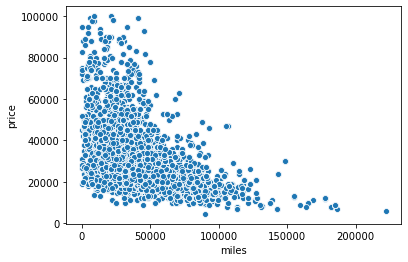

In [37]:
# Miles
# Lets see if miles has any outliers
ax = sns.scatterplot(x="miles", y="price", data=df_bs)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [38]:
# Remove outliers
df_bs=df_bs[(df_bs.miles < 300000) & (df_bs.miles > 1 )]

In [39]:
# Engine_block
# Change engine block of all electric cars to 'N/A'
df_bs.loc[df_bs.fuel_type == 'Electric', 'engine_block'] = 'N/A'

In [40]:
# Engine_size
# Change engine size of all electric cars to 0
df_bs.loc[df_bs.fuel_type == 'Electric', 'engine_size'] = 0

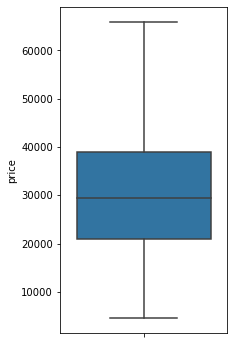

In [41]:
plt.figure(figsize=(3,6))
sns.boxplot(y='price', data=df_bs, showfliers=False);

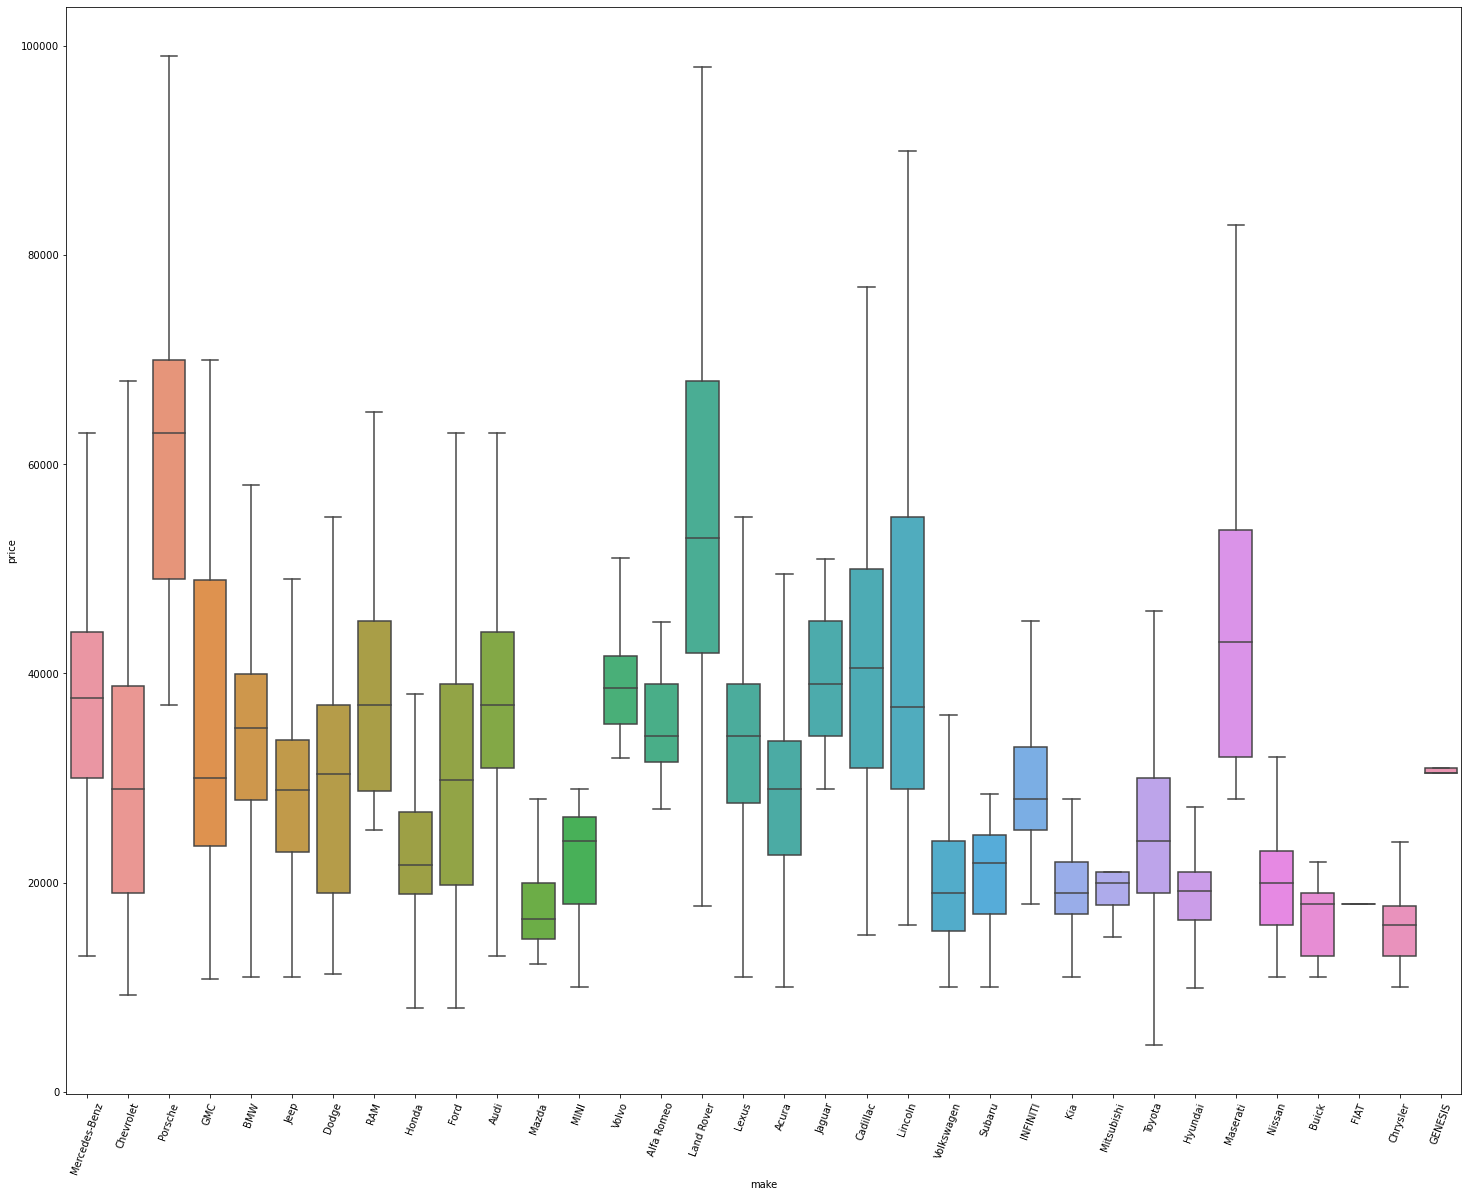

In [42]:
plt.figure(figsize=(25,20))
plt.xticks(rotation=70)
sns.boxplot(y='price', x='make', data=df_bs, showfliers=False)

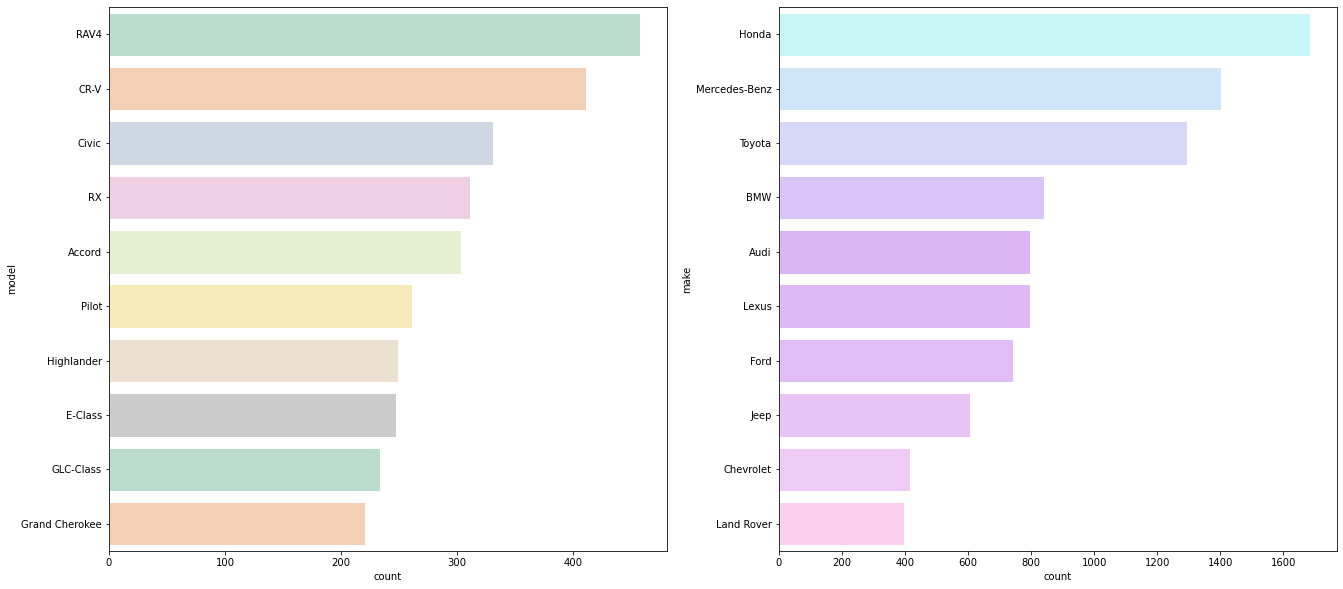

In [43]:
colors = ["#C0FDFF", "#C8E7FF","#D0D1FF","#D8BBFF","#DEAAFF","#E2AFFF","#E5B3FE","#ECBCFD","#F3C4FB","#FFCBF2"]
sns.set_palette(sns.color_palette(colors))


fig, ax =plt.subplots(1,2,figsize=(22, 10))
sns.set(rc={"axes.facecolor":"#fcfcfc", "axes.grid":False,'xtick.labelsize':20,'ytick.labelsize':20})
sns.countplot(y ='make',data = df_bs,order=df_bs.make.value_counts().iloc[:10].index, ax = ax[1],palette = colors) 
sns.countplot(y ='model',data = df_bs,order=df_bs.model.value_counts().iloc[:10].index, ax= ax[0],palette = "Pastel2")
fig.show()

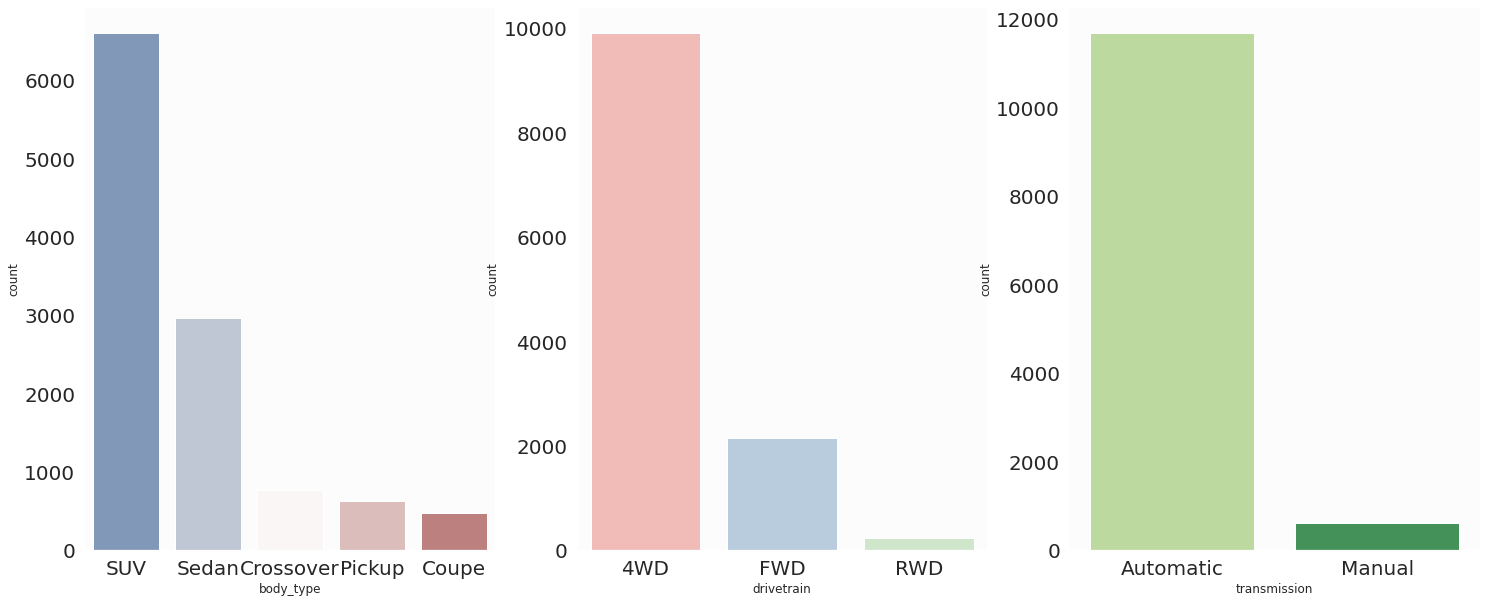

In [44]:
fig, ax =plt.subplots(1,3,figsize=(25, 10))
sns.set(rc={"axes.facecolor":"#fcfcfc", "axes.grid":False,'xtick.labelsize':15,'ytick.labelsize':15})
sns.countplot(x ='body_type',data = df_bs,order=df_bs.body_type.value_counts().iloc[:5].index, ax = ax[0],palette="vlag")
sns.countplot(x ='drivetrain',data = df_bs,order=df_bs.drivetrain.value_counts().iloc[:5].index, ax = ax[1],palette="Pastel1")
sns.countplot(x ='transmission',data = df_bs,order=df_bs.transmission.value_counts().iloc[:5].index, ax = ax[2],palette="YlGn")
fig.show()

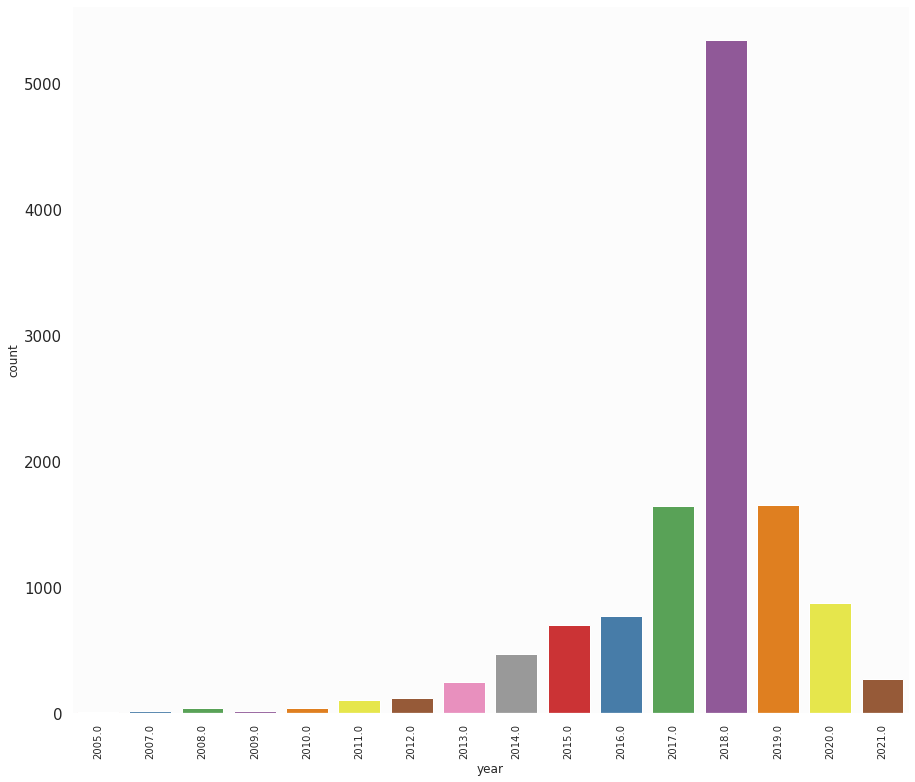

In [45]:
plt.figure(figsize=(15, 13))
ax = sns.countplot(x = 'year', data=df_bs, palette='Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontsize=10);

In [46]:
profile = pp(df_bs)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]